In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data

In [40]:
df = pd.read_csv('./data-bitcoin.csv')

In [41]:
df.head()

,날짜,현재가,오픈,고가,저가,거래량,변동 %
0,2019년 05월 13일,"7,110.3","6,984.7","7,111.4","6,893.1",1.26M,1.80%
1,2019년 05월 12일,"6,984.8","7,190.0","7,518.9","6,802.6",1.35M,-2.86%
2,2019년 05월 11일,"7,190.3","6,386.6","7,373.8","6,386.5",1.31M,12.59%
3,2019년 05월 10일,"6,386.0","6,194.3","6,466.6","6,157.8",907.94K,3.14%
4,2019년 05월 09일,"6,191.5","5,990.5","6,206.0","5,990.0",799.96K,3.36%


In [42]:
del df['변동 %']
df.columns = ['날짜', '현재가', '시가', '고가', '저가', '거래량']
df = df[['날짜', '현재가', '시가', '고가', '저가', '거래량']]

In [43]:
df.head()

,날짜,현재가,시가,고가,저가,거래량
0,2019년 05월 13일,"7,110.3","6,984.7","7,111.4","6,893.1",1.26M
1,2019년 05월 12일,"6,984.8","7,190.0","7,518.9","6,802.6",1.35M
2,2019년 05월 11일,"7,190.3","6,386.6","7,373.8","6,386.5",1.31M
3,2019년 05월 10일,"6,386.0","6,194.3","6,466.6","6,157.8",907.94K
4,2019년 05월 09일,"6,191.5","5,990.5","6,206.0","5,990.0",799.96K


# 문제 1. 각 컬럼을 다음의 형태로 변경하세요

### 힌트. 문자열 PARSING과 FOR문을 사용한다. (함수)

In [44]:
date_list = df['날짜'].tolist()

In [45]:
df['날짜'] = date_list

### 채워야 할 부분

In [48]:
df.head()

,날짜,현재가,시가,고가,저가,거래량
0,2019-05-13,7110.3,6984.7,7111.4,6893.1,1260000.0
1,2019-05-12,6984.8,7190.0,7518.9,6802.6,1350000.0
2,2019-05-11,7190.3,6386.6,7373.8,6386.5,1310000.0
3,2019-05-10,6386.0,6194.3,6466.6,6157.8,907940.0
4,2019-05-09,6191.5,5990.5,6206.0,5990.0,799960.0


In [36]:
df['종가'] = df['시가'].shift(1)
df['종가'].fillna(method='bfill', inplace=True)
df['날짜'] = pd.to_datetime(df['날짜'])
df.set_index('날짜', inplace=True)
df.sort_index(inplace=True)

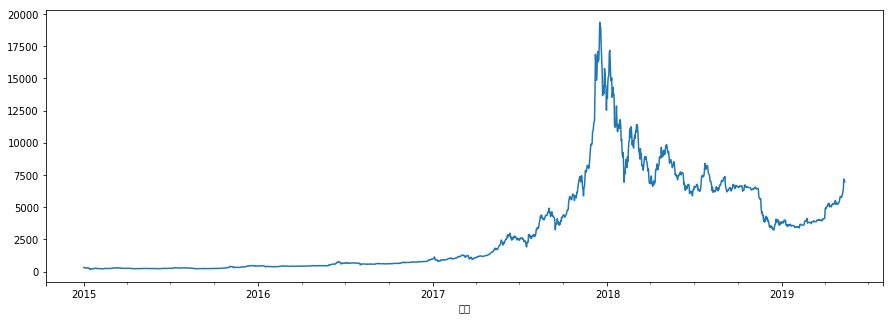

In [37]:
plt.figure(figsize=(15,5))
df['종가'].plot()

# 문제 2. 다음 전략에 따라서 성과를 출력하시오

### 자본금 10000달러 수수료 10%

In [ ]:
initial_money = 10000
fee = 0.1

### 1) 시가에 사고 종가에 판다.

### 2) 시가에 사서 10% 오르면 팔고 아니면 종가에 판다.

### 3) 시가에 사서 5% 떨어지면 팔고 아니면 종가에 판다.

# 문제 3. 복잡한 전략

### 1) 변동성 돌파

- 각 화폐의 레인지 계산(전일 고가 - 저가)
- 매수: 실시간 가격 > 당일 시가 + (레인지 * 0.5)
- 돌파에 성공한 날 자산의 50% 투입
- 매도: 다음 날 시가

### 2) 1)을 Class로 작성해보세요.